---
title: 通过 IDE 连接 MaixII-Dock
keywords: jupyter， MaixPy3 IDE， M2dock
desc: maixpy3  连接 MaixPy3 IDE 的方法
---


| 时间       | 负责人       |                      更新内容                      |
| ---------- | ------------ | :------------------------------------------------: |
| 2021-12-3  | Rui          |                    制定文档初稿                    |
| 2021-12-7  | 大老鼠 & Ray |                   微调排版及审核                   |
| 2021-12-8  | Rui          |      添加 IDE 基本的使用介绍,MaixPy3 入门目录      |
| 2022-01-14 | dalaoshu     |          配合 IDE 更新优化了用户使用体验           |
| 2022-01-17 | dalaoshu     | 根据小徐同学的视频反馈，修订了用词和补充 SD 卡说明 |
| 2022-03-02 | Rui          |    添加 MaixII-Dock 开箱视频，修改部分表述错误     |
| 2022-04-14 | Coty         |        添加 main.py 会被 kill 掉的解决方法         |
| 2022-06-09 | dalaoshu     |     重新强调了 m2dock 必须有 U 盘出现才能使用      |
| 2022-07-13 | dalaoshu     |               更新到最新的 0.5.1 了                |
| 2023-02-07 | wonder     |               添加版本 0.5.4 之后的镜像联网方法       |

# 使用 MaixPy3 IDE 连接 MaixII-Dock

## 产品宣传

<p align="center">
    <iframe src="//player.bilibili.com/player.html?aid=298543445&bvid=BV1sF411u7xb&cid=586467021&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true" style="max-width:640px; max-height:480px;"> </iframe>
</p>

## 开箱说明

<p align="center">
    <iframe src="//player.bilibili.com/player.html?bvid=BV14Z4y147Lg&page=1" scrolling="no" border="0" frameborder="no" framespacing="0" allowfullscreen="true" style="max-width:640px; max-height:480px;"> </iframe>
</p>

**使用前请仔细阅读以下内容，可以减少很多疑问**

## 避坑要点（重要）

1. 检查 USB 线和 USB 口是正常可用的，确定板子通电并插入电脑后，插入电脑驱动有提示，屏幕有背光有 画面出现，硬件接线电源无损坏。
2. 准备好可以启动系统的卡，如购买已烧录好系统的内存卡，可在购买时选择预烧录套餐（没有的需要[烧录系统方法](https://wiki.sipeed.com/hardware/zh/maixII/M2/flash.html)）。
3. 烧录或更新到最新 MaixPy3 镜像，确认 `pip list` 中的 maixpy3 包版本大于 0.5.0 以上。
4. 安装好 MaixPy3 IDE 软件，确保大于 0.5.0 版本。
5. 安装软件时会弹出驱动安装程序，请确认驱动安装完毕，连上硬件后启动系统后就会弹出虚拟 U 盘。
6. 上一步操作未出现虚拟 U 盘的话， Windows 用户需要手动前往设备管理器卸载 ADB 驱动且**勾选上删掉其驱动**，重启电脑后才能够弹出 U 盘。
7. **没有出现 U 盘的话那么电脑通过 OTG 接口是没法操作 M2Dock 的，因此务必重复上述的 5、6 直到看到 U 盘才能继续阅读下面的内容**
8. 确认 adb shell 终端可用（需要安装驱动），并确认 mjpg 服务存在后，就可以开始使用了。

## 初期准备工作

1. 安装 MaixPy3 IDE 软件，它会在安装时提示用户安装驱动，安装好后会弹出 jupyter notebook 的工作区，也就是你现在看到的文档。

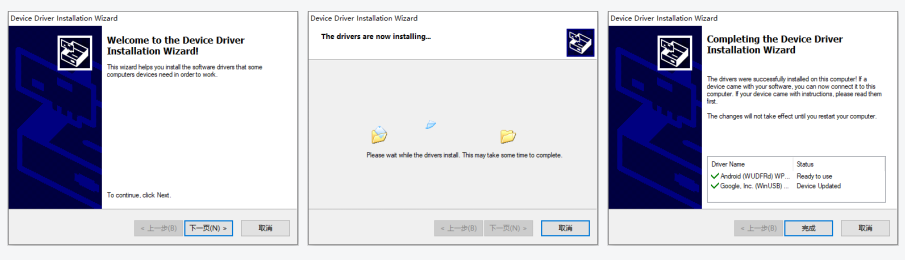

2. 选择一条可以传输数据的 Tpye-C 数据线（如购买时附带的数据线），不可以是充电线，或者转接头，不要延长或转接数据线，插入支持输出 500ma 以上电流的 USB 口，遇到无法解决的问题可以换线换口换电脑。

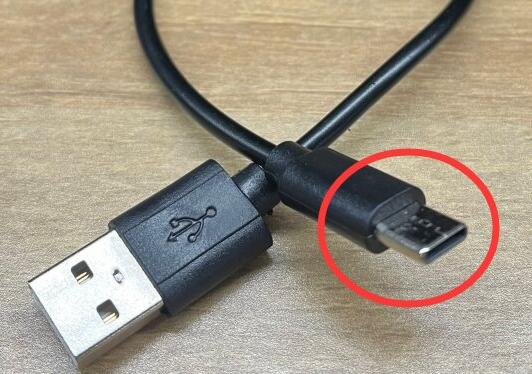

3. 插入带有 maixpy3 系统的 SD 卡，所烧录的系统版本大于 0.5.1 即可。

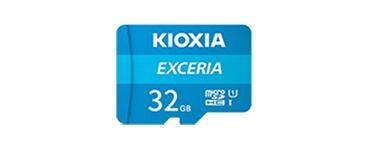

4. 将 板子 与 电脑 通过 OTG 标识的 USB 口连接，确认设备通电亮起（power）电源**红灯**，请看下图红圈别接错 USB 线，OTG 标识的丝印在板子背面。

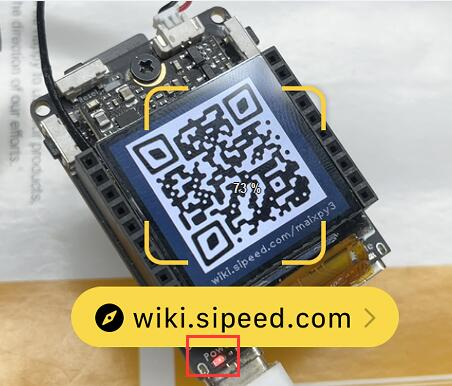

5. 确认屏幕出现 logo 或二维码（wiki）表示系统启动并已工作，此时电脑会弹出一个 U 盘，这意味着板子的系统已经准备就绪。（在 Windows 平台初次使用需要通过步骤 5 卸载一下驱动即可弹出 U 盘）

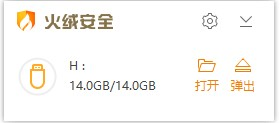

> 可以通过这个虚拟 U 盘在电脑和开发板之间传输文件，但是需要注意的是设备在传输文件后，最好先在电脑上弹出 U 盘、然后复位开发板来刷新板子里面的文件系统，可以避免文件损坏、文件错误这种现象。

<!-- > 可能会因为没有正常关机而丢失文件，并且需要 reboot 重启才会出现系统创建的文件。 -->

<!-- 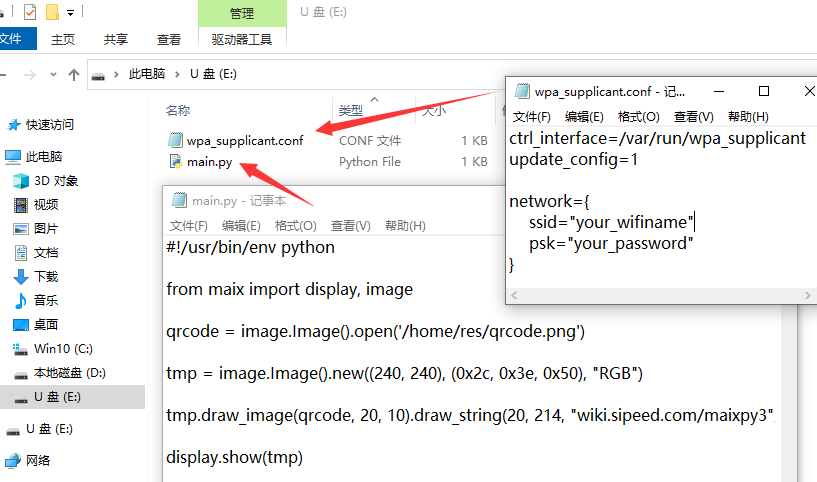 -->

> 该 U 盘目录对应的是板子上的 linux 系统 /root/ 目录，传输文件后自己可以在板子的目录中查看到。 <!--这里 main.py 是默认的开机脚本，wpa_supplicant.conf 是 WIFI 配置，最新系统支持 /root/app/main.py 文件夹优先于 main.py 脚本启动。 -->

6. 如果没有出现 U 盘，意味着驱动存在异常，则需要按下图手动卸载一下 Android ADB Interface 手机驱动（常见于 XX 手机助手）。

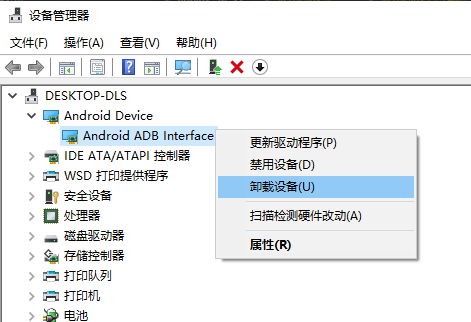

找到它，勾选卸载驱动即可，此时 U 盘跳出，系统准备就绪，**之后遇到的问题与底层硬件没有任何关系！！！**

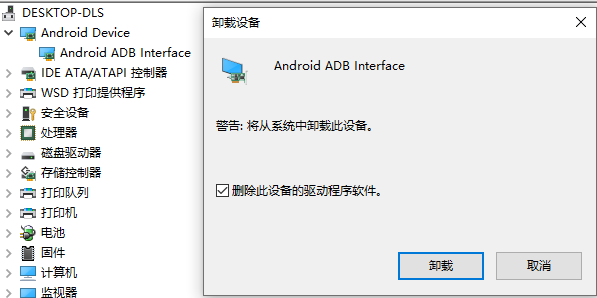

**如果 U 盘还是没有如上述步骤出现，可以重烧系统或重启设备或考虑换台电脑操作，有可能是个别系统驱动不兼容导致的，实在是解决不了，可以在 bbs.sipeed.com 汇报给 @ 管理员帮忙解决。**


## 如何运行代码

运行前的可以检查一下运行环境是否正常。

- IDE 软件启动时会附带一个 keep_adb.exe 命令行终端的程序提供给熟悉 linux 终端操作开发板的同学。

- IDE 0.4.2 后 keep_adb 服务会自动调用 adb 配置映射（forward）端口（22，18811，18812）。

- 与板子连接的 ide 服务是否工作，判断方法可以在交互终端输入 `ps | grep mjpg` 查看是否存在下图红框所指示的服务。

- 如果发现不存在 ide 服务（ `python -c 'from maix import mjpg;mjpg.start();'` ），可以手动运行服务，并把现象汇报到社区，目前发现该现象主要出现在 Windows 11 系统之间的差异上。

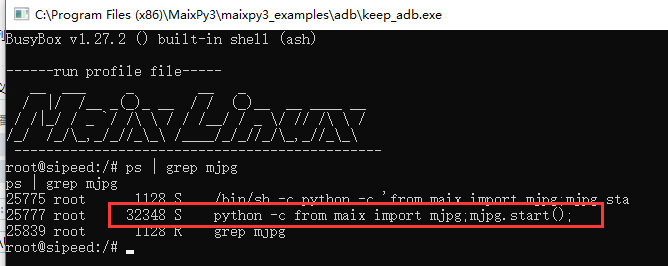

- 确认系统防火墙是否阻止了软件底层所需要 TCP 18811 18812 的端口号，主要用于运行程序和图像传输。

想知道更多，可以点此查看关于 [MaixPy3 IDE](https://wiki.sipeed.com/soft/maixpy3/zh/tools/MaixPy3_IDE.html) 的更加详细的介绍，此处不再赘述。

### 选择 RPyc-Python 核心表示在板子上运行 Python 程序

将 IDE 的内核应切换成 RPyc-python

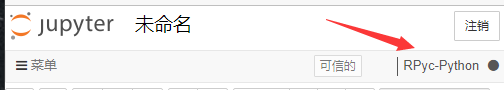

### 简单 juputer notebook 快捷键说明

这里介绍每个方框称为单元格，单元框左侧会有 **蓝色（命令模式）** 或 **绿色（编辑模式）** 两种颜色。

**`蓝色单元格`(命令模式)**

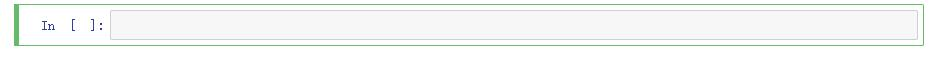

**`绿色单元格`(编辑模式)**

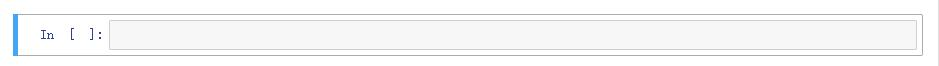

通用用法：

- **Shift+ Enter：**运行单元格，且以命令模式切换到下一个单元格
- **Ctrl + Enter：**运行单元格，且进入命令模式

编辑模式中：

- **Esc**：进入命令模式

命令模式中：

- **h：**打开帮助
- **Enter：**进入编辑模式
- **x：**剪切单元格
- **c：**复制单元格
- **v：**粘贴单元格
- **dd：**删除整个单元格
- **ii：**终止运行
- **a：**向光标所在单元格上方添加单元格
- **b：**向下添加
- **m：**使得单元格变成 markdown 状态

### 如何运行 Python 代码

点击选择代码块，点击上方工具中的运行，即可运行代码并输出结果，运行后会出现 \* 表示程序正常运行。

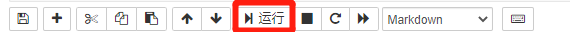

### 如何停止刚才运行的 Python 代码

选择正在运行的代码，点击上方工具栏中的停止，即可停止运行代码，快捷键是按两下 ii 喔。

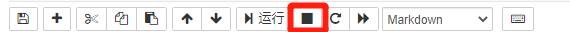

如果有其他程序正在运行的话，需要先点停止，等程序断开了后（代码块前的 \* 号消失），再点运行。

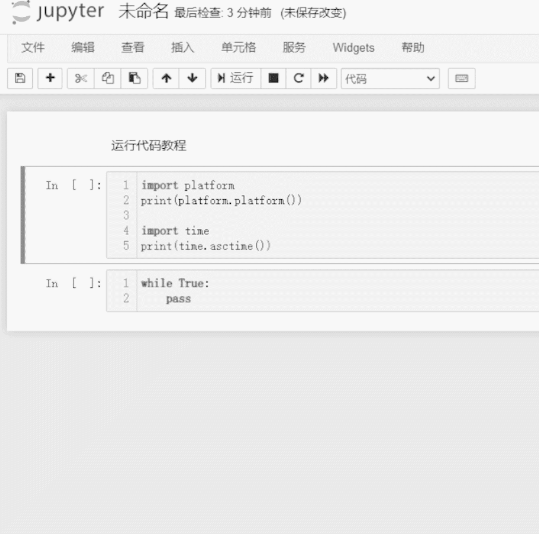

### 运行时出现问题？

IDE 的每个代码单元块运行是按顺序依次排队运行，当前一个代码没有运行结束的时候，后一个代码是不会运行。

当出现代码运行之后没有出现结果，或者是卡住了，停下程序、重启 IDE 、重启开发板等操作就可以解决问题。

> 2022 年 7 月 13 日 画面撕裂问题可以重新运行一下程序即可，原因是 show 的图像大小发生变化导致的撕裂，等待后续的修复。

## 不妨来试试?

点击下列代码块，再点击上方菜单栏中的运行，测试板子连接是否正常。


In [1]:
import platform
print(platform.platform())

import time
print(time.asctime())

[ rpyc-kernel ]( running at Wed Jul 13 15:20:20 2022 )
Linux-4.9.118-armv7l-with-libc
Thu Jan  1 04:04:55 1970


上述结果可知：

一、运行这段代码的时间是 \[ rpyc-kernel \]( running at Wed Jul 13 15:20:20 2022 )

二、运行这段代码的平台是 Linux-4.9.118-armv7l-with-libc

三、运行这段代码的时候，板子系统时间是 Thu Jan 1 04:04:55 1970。

当代码运行的时间为当前时间，并打印出以上代码，说明开发板已经连接上并可以正常的使用

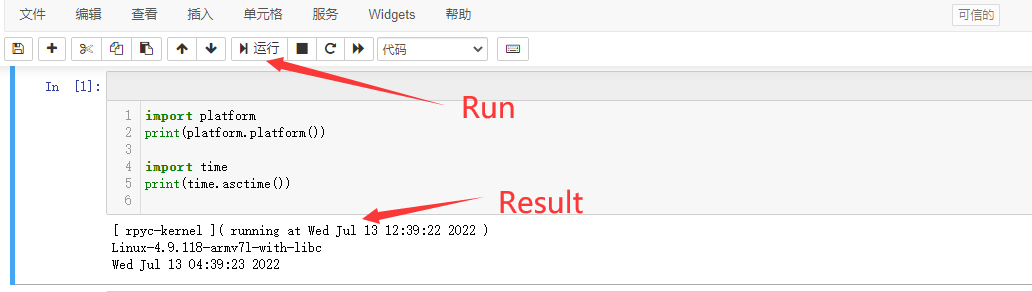


## 如何传输文件

M2Dock 通过 OTG 口连接电脑后，在电脑中可以看到一个 U 盘，将想要的文件拖入进 U 盘后，就相当于与将文件从电脑传输到 M2Dock 中了。

<!-- > 传输文件后要使用电脑自带的移除 U 盘方式来保证文件在没有损坏的情况下保存进板卡 -->

电脑上的 U 盘对应着 M2Dock 文件系统的 /root 目录。将文件存进去后，务必使用电脑系统自带的 U 盘移除相关的功能来断开电脑与 U 盘的通信，然后重启（按下 RST 键或者重新插拔 USB）来使 m2dock 再次重新加载文件系统。否则会因为板子与电脑的非正常断开通信而导致 m2dock 的文件系统损坏，保存文件失败。

## 更新 MaixPy3 包

有时候 MaixPy3 更新了，增加了新特性，可以在不重新烧录板子系统的情况下，手动更新 MaixPy3。

可以手动下载最新的 MaixPy3 [安装包](https://pypi.org/project/maixpy3/#history)

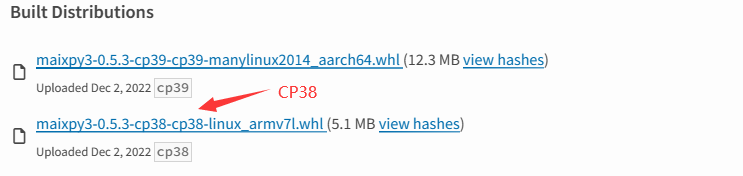

下载带有 cp8 的安装包，cp9 是给别的平台使用的。将这个安装的名字修改成 `maixpy3-9.9.9-cp38-cp38-linux_armv7l.whl`,直接存放到开发板中，使用电脑系统自带的弹出 U 盘操作方式来移除 U 盘，这样可以避免损坏 U 盘的文件系统。重启开发板就会自动更新和安装 MaixPy3。

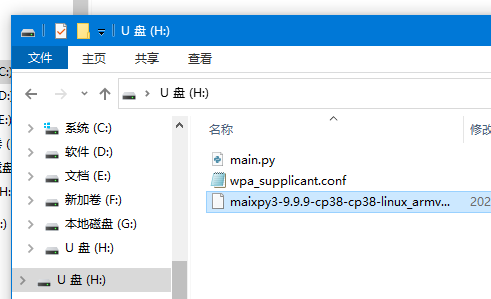

升级的时候不要进行其他操作，这样会损坏板子的文件系统。

## 配置开机启动脚本

对于 M2Dock，我们只需要把开机想要运行的 python 代码存成名为 `main.py` 的文件，然后存放在 U 盘里对应的位置来开机运行脚本。

- 如果 U 盘目录下`存在`名称为 app 的文件夹，把 main.py 文件存放到 app 文件夹里接可以开机执行程序了
- 如果 U 盘目录下`没有`名称为 app 的文件夹，把 main.py 文件存放在 U 盘里面就可以直接开机执行程序了

> 存入文件后需要使用电脑操作系统自带的移除 U 盘方式来保证文件在没有损坏的情况下保存进板卡，否则会因为不当操作而导致 `main.py` 没有正常保存到 U 盘（板卡系统）里面。

简单来说 M2Dock 会优先执行 U 盘目录 app 文件夹下的 main.py 脚本，如果 app 文件夹下没有 main.py 文件的话就会执行 U 盘目录下的 main.py 脚本。

> MaixPy3 IDE 在运行时会停止 M2Dock 的开机脚本程序，所以我们应该在电脑托盘找到并退出 MaixPy3 IDE 或者选择仅使用板子上的 TypeC 串口来进行供电以查看开机运行脚本效果

---

补充说明：

在编辑 `main.py` 的时候记得确认文本编码格式为 UTF-8 。

在开发板上 `/etc/init.d` 目录下存在着原始的启动脚本，在 `/etc/init.d/S02app` 存在如下的判断语法：

![m2dock_rc_start_content](./assets/m2dock_rc_start_content.png)

可以看到是先判断 `/root/app/main.py` ，然后判断 `/root/main.py` ，所以两个 main.py 不会一起执行。

如果 main.py 开机启动异常，可能出现 Python 语法错误的时候可以在所执行的 `main.py` 的当前目录里的 `main.py.log` 文件查看得知。

重启板子的话使用 `reboot` 命令，关机使用 `poweroff` 指令。尽量不要用 reset 按键或者直接断电来操作板子。

下面的代码是 root 目录下 main.py 文件里的默认内容

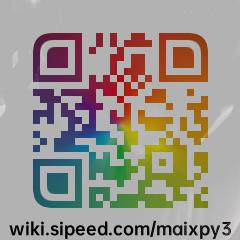

In [1]:
#!/usr/bin/env python
from maix import camera, display, image, nn
image.load_freetype("/home/res/sans.ttf")
qrcode = image.open('/home/res/qrcode.png')
canvas = image.new((display.width(), display.height()), (0xFF, 0xFF, 0xFF), "RGB")
canvas.draw_image(qrcode, (canvas.width - qrcode.width) // 2, (canvas.height - qrcode.height) // 2)
info = "wiki.sipeed.com/maixpy3"
w, h = image.get_string_size(info, 1.2)
canvas.draw_string((canvas.width - w) // 2 + 5, canvas.height - h - 5, info, 1.2, color=(0x00, 0x00, 0x00))
for i in range(120):
    img = camera.capture().draw_image(canvas, alpha=0.7)
    display.show(img)

## 常见问题指南

### 没有弹出 U 盘或者 adb 提示 device not found

![adb_no_device_found](./assets/adb_no_device_found.png)

出现这种问题的情况有如下可能：

1. 所使用的 TypeC 线只有供电功能，没有数据传输功能
2. 使用的是 C2C 数据线
3. 板子不是通过 OTG 口与电脑连接
4. U 盘没出现，需要手动卸载 ADB 驱动
5. 板子 LINUX 系统没启动，比如没有插入烧录过系统的 TF 卡

### 启动 IDE 的时候出现下面的提示框

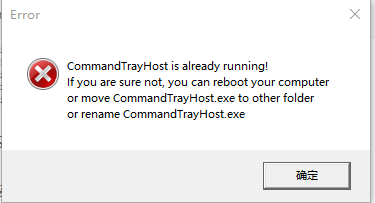

上面这个框这个说明 IDE 已经在正常运行了

在电脑的任务栏通知区域找到下图所示的图标（注意是退出两个字左边的类似于盾牌的标志）且选择重启即可，

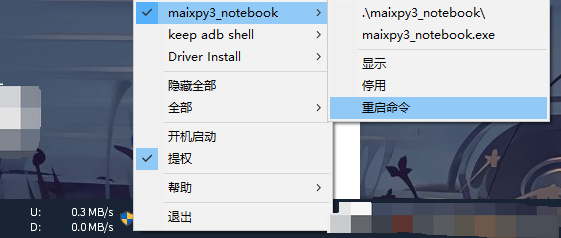

### 如何退出 MaixPy3 IDE

因为它是 jupyter 网络服务，所以需要从底下托盘右键退出；否则关闭浏览器后，它的网络服务还挂在后台运行的。

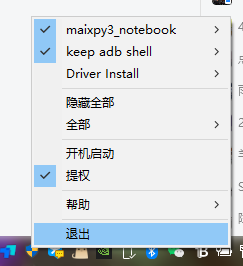

### 我的 MaixPy3 IDE 没有跳出浏览器，没有可以操作的页面。

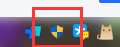

点击托盘查看 MaixPy3 jupyter 服务是否存在，存在则手动复制以下红框的地址到支持谷歌内核(chromium)的浏览器中进入（有少数同学遇到）。

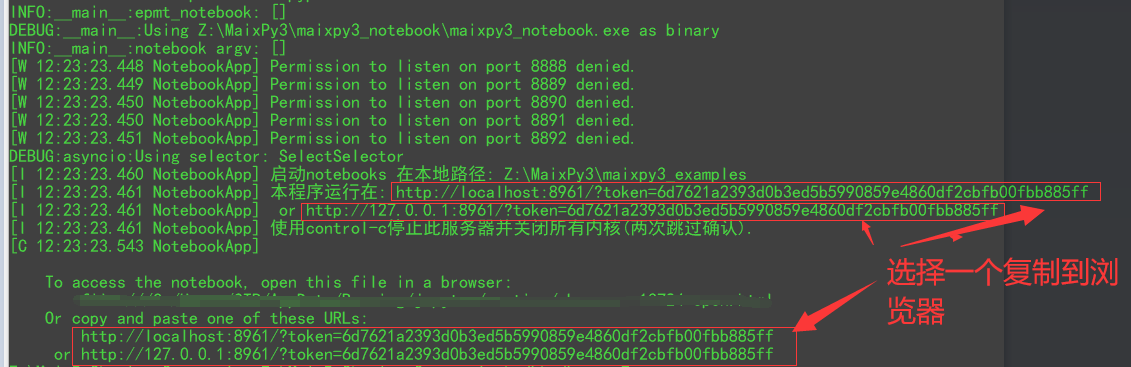

### 无法新建或保存文件

出现如下信息时，需要开启 IDE 提权，这可以在 [无法启动 IDE](#无法启动IDE) 内容的图中看到应当勾选内容

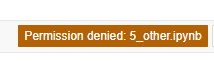

### 如何设置成中文界面

请搜索 jupyter notebook 如何设置成中文，修改对应的语言环境变量即可，如设置中文时需要变量名为：LANG 变量值：zh_CN.UTF8。

### 虚拟 U 盘文件复制失败，看不到文件。

#### 从电脑复制到 U 盘

这种情况可能是文件较大没能完整传输所导致的，需要在传输结束后先在电脑上移除虚拟 U 盘，然后在板子执行 `reboot` 命令或者按下 RST 键重启板子来加载文件系统。

#### 在 U 盘创建文件

只用板子命令行终端在 `/root/` 下创建文件够不会同步在 U 盘里显示，这时需要重启一下就能在 U 盘里看到通过板子终端在 `/root/` 所创建的文件了

### 终端执行 python 文件 报错

- 提示 `SyntaxError: Non-UTF-8` 的话是需要先在文件头部声明编码格式
  比如再头部添加一句 `# encoding: utf-8` 可以看[这里](https://wiki.sipeed.com/soft/maixpy3/zh/origin/python.html)学习一下

### notebook 实时画面会出现撕裂，而图传正常。

- 停止程序后重新运行一下程序就行，常发生在运行多次显示不同尺寸的图像时候，这是一个不太好修的 bug （逃）。

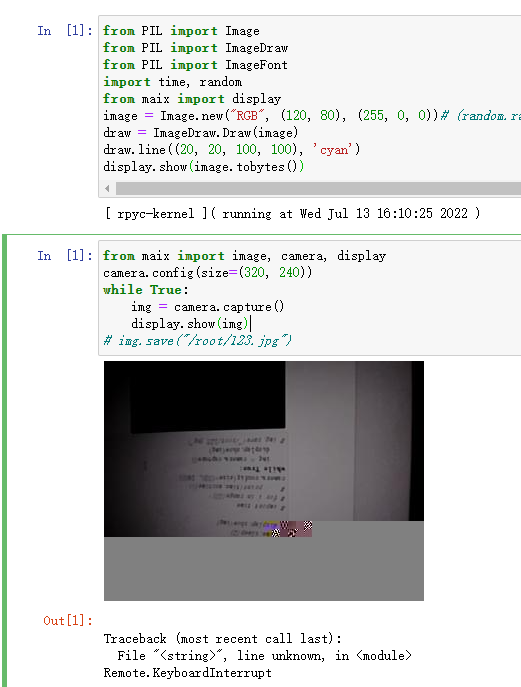

- 不过运行代码时的图传服务 http://127.0.0.1:18811 不受影响，是 jupyter rpyc_ikernel 内核内部实现的问题。

### 删掉了 app 文件夹后如何使用 maixhub

app 文件夹里面的内容可以在 [maixhub](https://maixhub.com/app/1) 下载到，按照页面所说的进行操作就可以得到删除前的 app 功能了。

### 更多请查阅 [MaixPy3 常见问题与解决方法](https://wiki.sipeed.com/soft/maixpy3/zh/question/maixpy3_faq.html)
